In [1]:
!python -m pip install lightkurve --upgrade

  Created wheel for bokeh: filename=bokeh-2.3.2-py3-none-any.whl size=11334269 sha256=10101f0cd9a02a905bf39f96d0c6148f36d4eaecdeca191d9a8dedecf5fd75f6
  Stored in directory: c:\users\erto_\appdata\local\pip\cache\wheels\1b\a5\90\f38b6cd80a8276a7203765295ad3da078aa24ff8006096ae49
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=12b56aed5b46a5818c073fb161830f44d5c91f58b79e1a32814c2f2d4c7103d8
  Stored in directory: c:\users\erto_\appdata\local\pip\cache\wheels\b4\3b\77\a06a07a415b222f47a7e522333f85ce64c0defd07a57762267
  Created wheel for oktopus: filename=oktopus-0.1.2-py3-none-any.whl size=12779 sha256=722fbe6a25d1e24cd220d7c12b182bc5916186d7ffe5c1c2ee03fb2a34146de8
  Stored in directory: c:\users\erto_\appdata\local\pip\cache\wheels\64\ce\28\996e7379ac5b58670a47dc73b9ef012eee837643d839bf9adf
  Created wheel for pyvo: filename=pyvo-1.1-py3-none-any.whl size=801573 sha256=c2b4239b2fbf74438238c7a497ff874dda56180e9ff38ea773e0cee565dec56a
  Stored in directo

In [15]:
import lightkurve as lk
%matplotlib inline

In [17]:
import pandas as pd
nombre_columnas = ['time', 'magnitud', 'error'] #Nombre de columnas de la instnacia del archivo de OGLE
df_prueba = pd.read_csv("Datasets\OGLE-III\LCs/OGLE-BLG-CEP-01.dat", sep=' ', names=nombre_columnas)

df_prueba['time'] = df_prueba['time'] + 2450000 #Intento de hacer que la libreria pueda "leer" bien el formato del tiempo

# datetime_series = pd.to_datetime(df_prueba['time'], unit='D', origin='julian')
# datetime_index = pd.DatetimeIndex(datetime_series.values)

# df_prueba = df_prueba.set_index(datetime_index) #Indexamos el df con la columna del tiempo, porque la libreria lo necesita
# df_prueba.drop('time',axis=1,inplace=True)


# df_ts = TimeSeries.from_pandas(df_prueba) #Creamos el TimeSeries a partir del df
# plt.plot(df_ts.time.jd, df_ts['magnitud'], 'o', markersize=1)
# plt.xlabel('Julian Date')
# plt.ylabel('Magnitud')
# plt.show()

# print(type(df_ts.time))

In [18]:
df_prueba

,time,magnitud,error
0,2.452125e+06,17.201,0.019
1,2.452130e+06,17.118,0.015
2,2.452132e+06,17.243,0.016
3,2.452136e+06,17.558,0.024
4,2.452141e+06,17.290,0.019
...,...,...,...
344,2.453645e+06,17.341,0.017
345,2.453651e+06,17.497,0.020
346,2.453653e+06,17.451,0.041
347,2.453774e+06,17.168,0.019


In [19]:
lc1= lk.LightCurve(time=df_prueba['time'], flux=df_prueba['magnitud']) 

In [20]:
pg = lc1.to_periodogram(method='bls')

`period` contains 679101 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


In [21]:
pg = lc1.to_periodogram(method='lombscargle', oversample_factor=100)

In [22]:
pg

LombScarglePeriodogram(ID: None)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

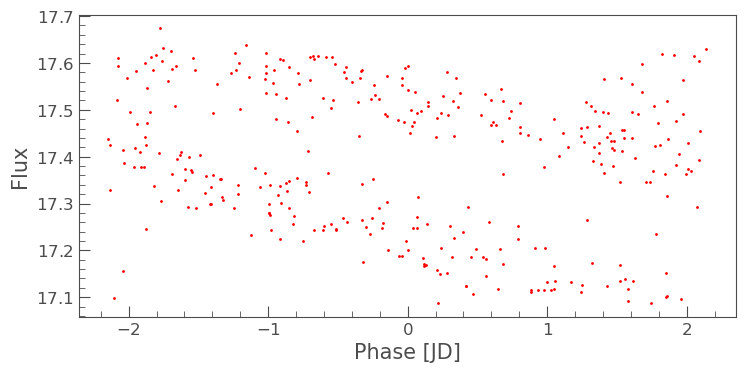

In [23]:
lc1.fold(pg.period_at_max_power).scatter(color='red')

In [24]:
pg.period_at_max_power

<Quantity 4.29465104 d>

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

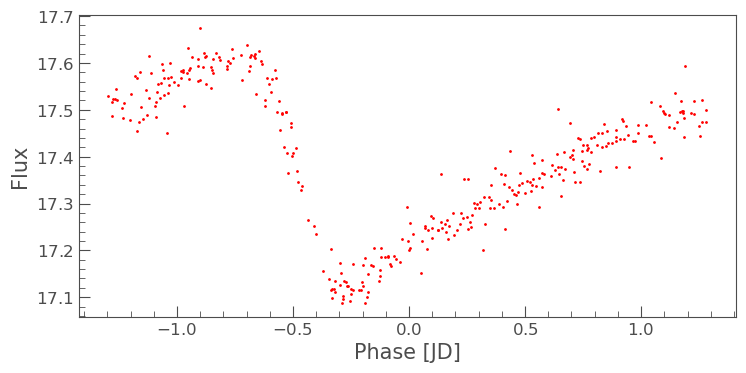

In [25]:
lc1.fold(2.5975506).scatter(color='red')